Hey let me introduce my own notebook. I'm beginner in Kaggle and machine-learning

> I got the score 0.78 at public LB with ths kernel
and used ensemble & stacking method for prediction,
also used full pipeline to extract and change features

best regards.

# 1. Import Modules

In [53]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette=sns.color_palette('Set2',9))

from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, StratifiedKFold, GridSearchCV,RandomizedSearchCV

from xgboost import XGBRFClassifier,XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier

from scipy.stats import uniform,randint

In [54]:
# !pip install seaborn --upgrade
# import os
# os._exit(00)

In [55]:
print(sns.__version__)

0.11.0


# 2. Load Data & Scanning

In [56]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [57]:
train_path='/kaggle/input/titanic/train.csv'
test_path='/kaggle/input/titanic/test.csv'
titanic_train=pd.read_csv(train_path)
titanic_test=pd.read_csv(test_path)

In [58]:
titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [59]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [60]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# 3. Exploratory Data analysis

## 3.1 Data skimming

In [62]:
def plot_mutihist(num_row,num_col,hist_columns):

    f,axs=plt.subplots(num_row,num_col,squeeze=True,figsize=(20,10))
    for i in range(len(hist_columns)%num_col,num_col):
        axs[num_row-1,i].remove()
    for i in range(len(hist_columns)):
        sns.histplot(data=titanic_train,x=hist_columns[i], ax=axs[i//num_col,i%num_col])
    f.tight_layout()

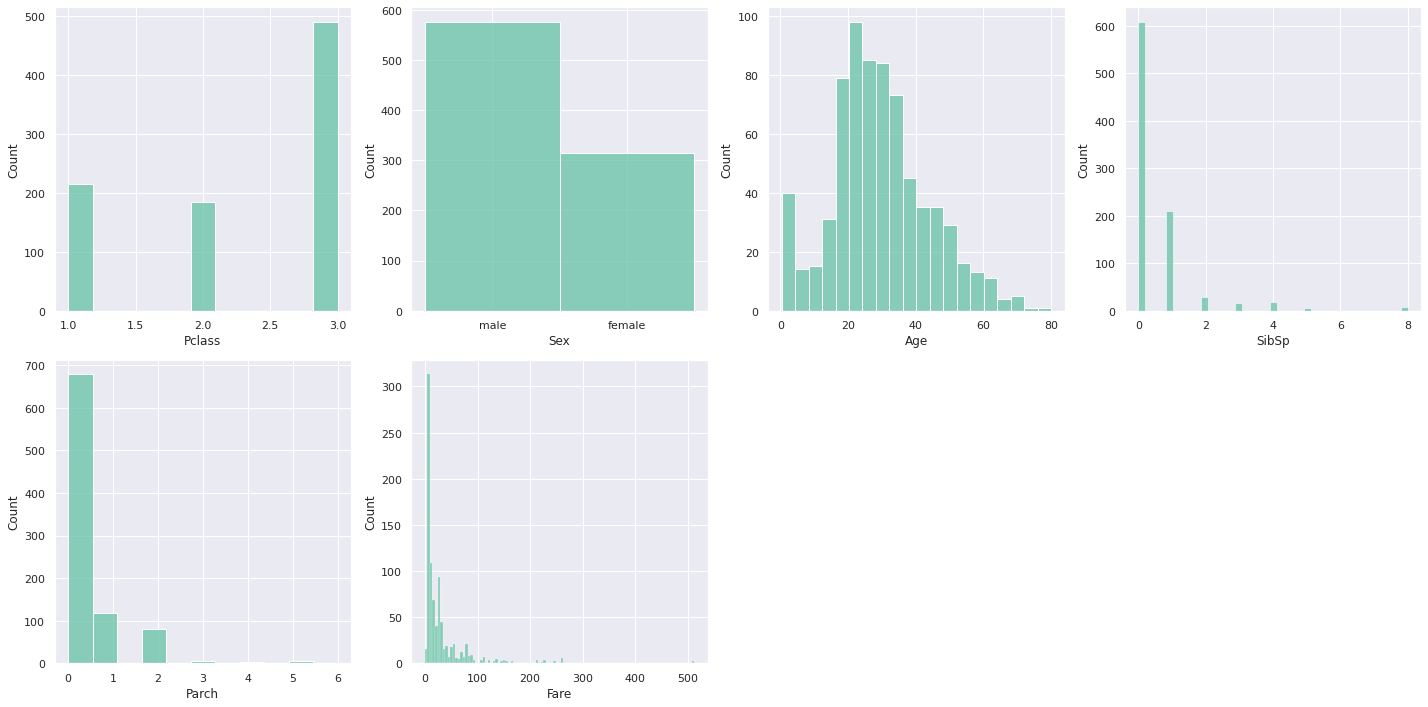

In [63]:
titanic_hist_columns=['Pclass','Sex','Age','SibSp','Parch','Fare']
plot_mutihist(num_row=2,num_col=4,hist_columns=titanic_hist_columns)

In [64]:
def plot_countplot_hue(num_row,num_col,count_columns):

    f,axs=plt.subplots(num_row,num_col,squeeze=True,figsize=(15,10))
    for i in range(len(count_columns)%num_col,num_col):
        axs[num_row-1,i].remove()
    for i in range(len(count_columns)):
        sns.countplot(data=titanic_train,x=count_columns[i],hue='Survived',ax=axs[i//num_col,i%num_col])

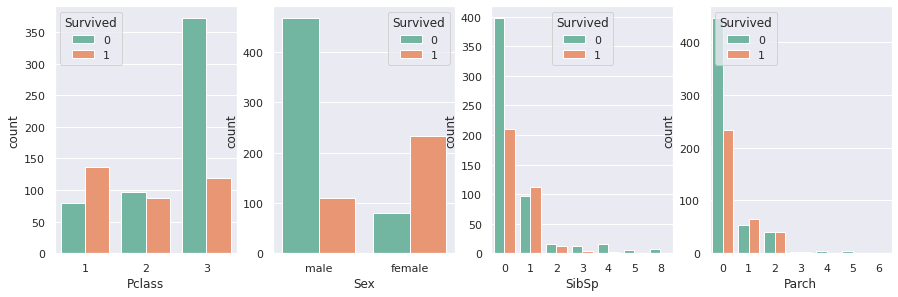

In [65]:
titanic_count_columns=['Pclass','Sex','SibSp','Parch']
plot_countplot_hue(num_row=2,num_col=4,count_columns=titanic_count_columns)

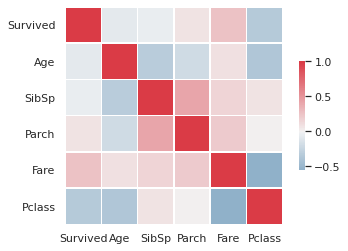

In [66]:
titanic_heatmap_columns=['Survived','Age','SibSp','Parch','Fare','Pclass']
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(titanic_train[titanic_heatmap_columns].corr(), cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) 

## 3.2 Feature analysis

### 3.3.1 Pclass, Sex

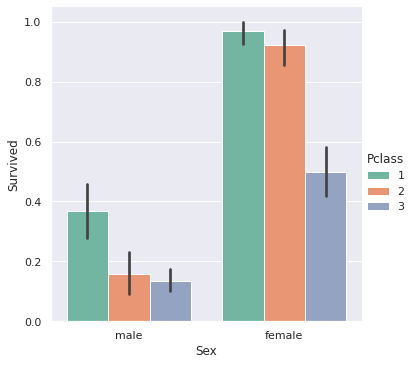

In [67]:
sns.catplot(x='Sex',y='Survived',kind='bar',hue='Pclass',data=titanic_train)

One-hot-encoding features

### 3.3.2 SibSp, Parch

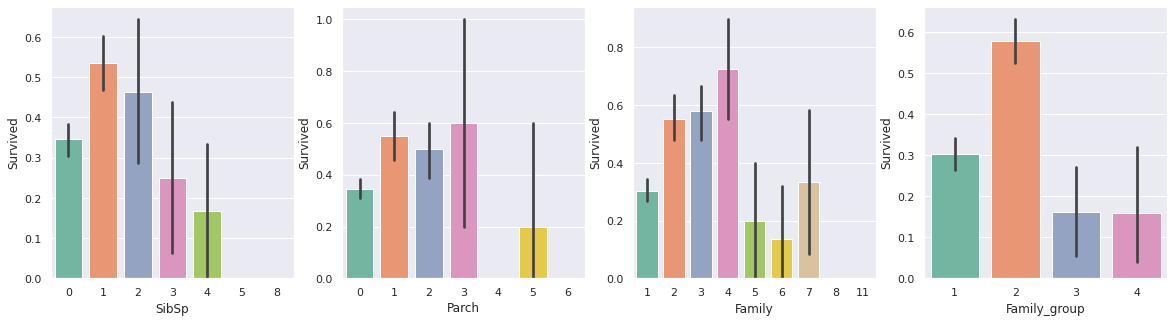

In [68]:
f,axs=plt.subplots(1,4,squeeze=True,figsize=(20,5))
sns.barplot(x='SibSp',y='Survived',data=titanic_train,ax=axs[0])
sns.barplot(x='Parch',y='Survived',data=titanic_train,ax=axs[1])

titanic_train['Family']=titanic_train['SibSp']+titanic_train['Parch']+1
sns.barplot(x='Family',y='Survived',data=titanic_train,ax=axs[2])
def groupfamily(x):
    if x==1:
        return 1
    elif (2<=x)&(x<=4):
        return 2
    elif (5<=x)&(x<=6):
        return 3
    else:
        return 4
titanic_train['Family_group']=titanic_train['Family'].apply(groupfamily)

sns.barplot(x='Family_group',y='Survived',data=titanic_train,ax=axs[3])

split family by 1/2,3,4/5,6/7,8,11

### 3.3.3 Age, Fare

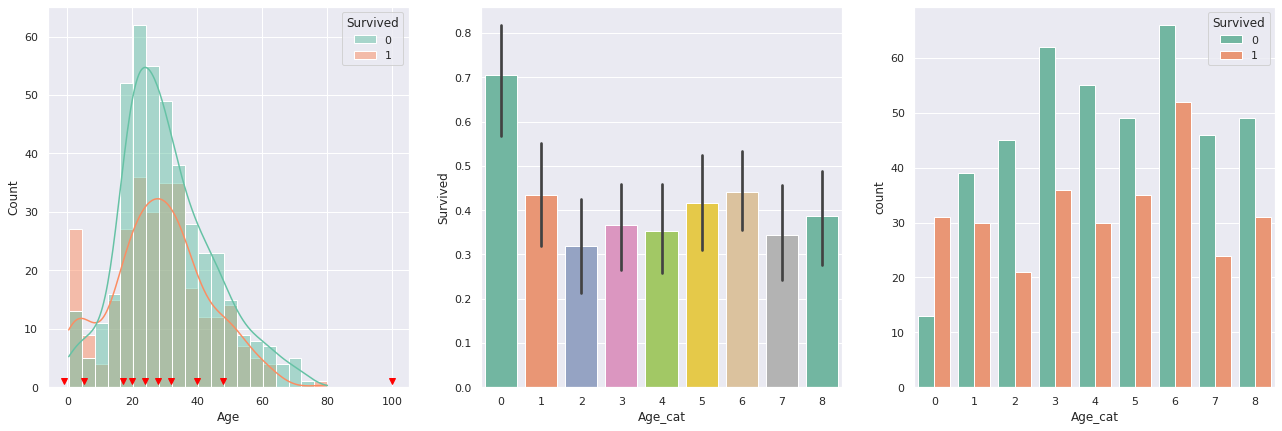

In [69]:
AGE_BINS=[-1,5,17,20,24,28,32,40,48,100]
titanic_train['Age_cat']=pd.cut(titanic_train['Age'],AGE_BINS,labels=[0,1,2,3,4,5,6,7,8])

f,axs=plt.subplots(1,3,squeeze=True,figsize=(22,7))

sns.histplot(data=titanic_train, x="Age", bins='auto',kde=True, hue="Survived",ax=axs[0])
axs[0].plot(AGE_BINS, np.ones(len(AGE_BINS)) ,'rv')

sns.barplot(x='Age_cat',y='Survived',data=titanic_train,ax=axs[1])

sns.countplot(data=titanic_train, x="Age_cat", hue="Survived",ax=axs[2])

Binning Age

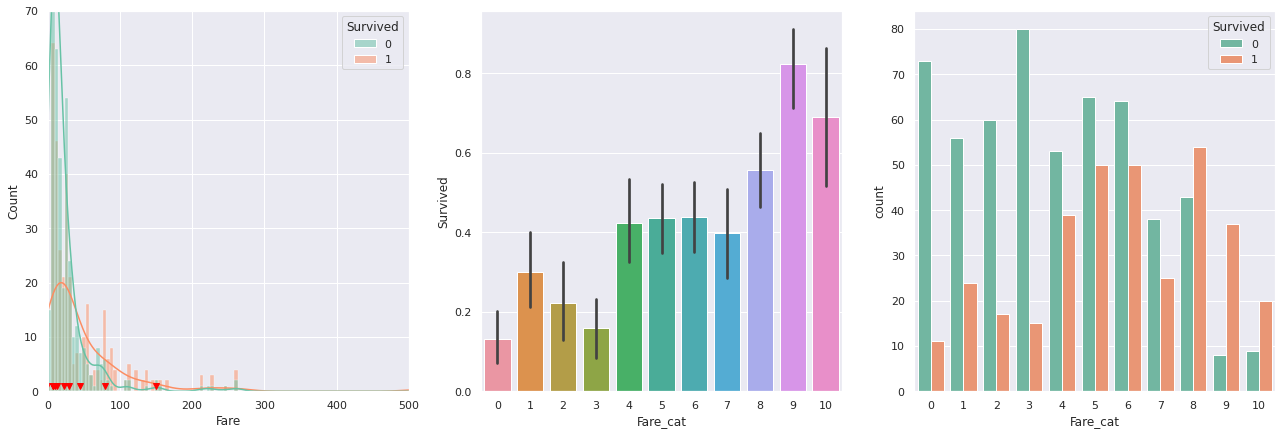

In [70]:
FARE_BINS=[-1,7.35, 7.82, 8, 10, 13, 23,30, 45, 80, 150, 1000]
titanic_train['Fare_cat']=pd.cut(titanic_train['Fare'],bins=FARE_BINS,labels=[0,1,2,3,4,5,6,7,8,9,10])

f,axs=plt.subplots(1,3,squeeze=True,figsize=(22,7))

sns.histplot(data=titanic_train, x="Fare",bins='auto',kde=True, hue="Survived",ax=axs[0])
axs[0].plot(FARE_BINS,np.ones(len(FARE_BINS)),'rv')
axs[0].set_ylim(0,70)
axs[0].set_xlim(0,500)

sns.barplot(x='Fare_cat',y='Survived',data=titanic_train,ax=axs[1])

sns.countplot(data=titanic_train, x="Fare_cat", hue="Survived",ax=axs[2])

Binning Fare

### 3.3.4 Embarked

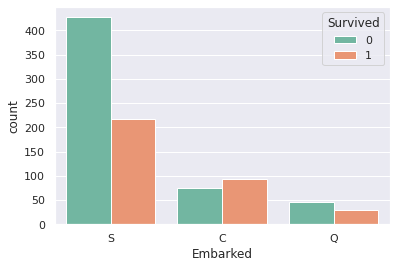

In [71]:
sns.countplot(data=titanic_train, x="Embarked", hue="Survived")

One-hot-encoding

### 3.3.5 Cabin

(0.0, 50.0)

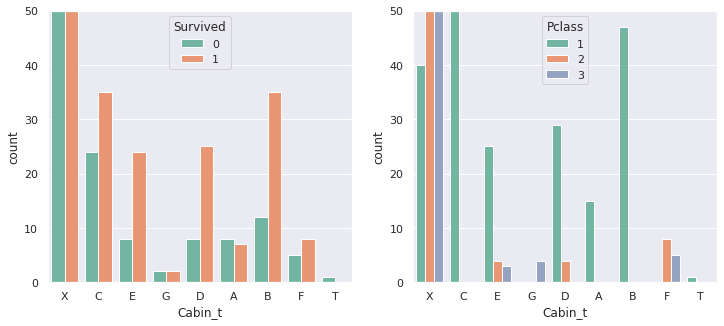

In [72]:
titanic_train['Cabin_t']=titanic_train['Cabin'].str.get(i=0)
titanic_train['Cabin_t'].fillna('X',inplace=True)
f,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
sns.countplot(data=titanic_train, x="Cabin_t", hue="Survived",ax=ax1)
sns.countplot(data=titanic_train, x="Cabin_t", hue="Pclass",ax=ax2)
ax1.set_ylim(0,50)
ax2.set_ylim(0,50)

A,B,C,T are all 1st class
/ D,E are 80% 1st class
/ F,G are 2nd/3rd class

In [73]:
titanic_train['Cabin_t'] = titanic_train['Cabin_t'].replace(['A', 'B', 'C','T'], 'ABCT')
titanic_train['Cabin_t'] = titanic_train['Cabin_t'].replace(['D', 'E'], 'DE')
titanic_train['Cabin_t'] = titanic_train['Cabin_t'].replace(['F', 'G'], 'FG')

(0.0, 200.0)

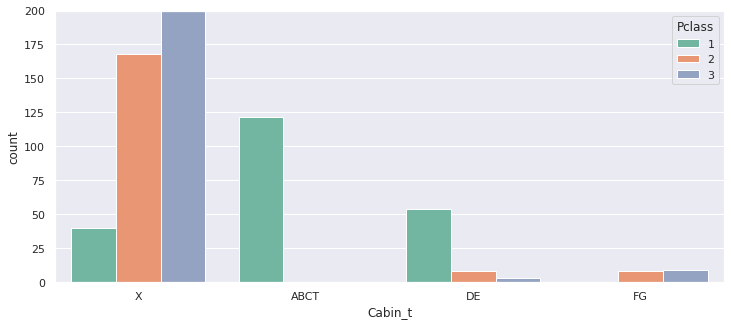

In [74]:
f,ax1=plt.subplots(figsize=(12,5))
sns.countplot(data=titanic_train, x="Cabin_t", hue="Pclass",ax=ax1)
ax1.set_ylim(0,200)

### 3.3.6 Name

In [75]:
titanic_train['Name_m']=titanic_train['Name'].str.split(pat=', ',n=1,expand=True)[1].str.split(pat='.',n=1,expand=True)[0]


def Name_transform(x):
    if x=='Mr':
        return 'Mr'
    elif x=='Mrs':
        return 'Mrs'
    elif x=='Miss':
        return 'Miss'
    else:
        return 'etc'
titanic_train['Name_M']=titanic_train['Name_m'].apply(Name_transform)

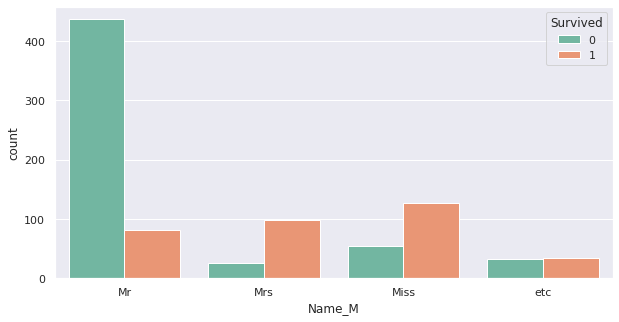

In [76]:
f,ax1=plt.subplots(1,1,squeeze=True,figsize=(10,5))
sns.countplot(data=titanic_train, x="Name_M", hue="Survived",ax=ax1)

### 3.3.7 Ticket

In [77]:
titanic_train['Ticket_Freq']=titanic_train.groupby('Ticket')['Ticket'].transform('count')

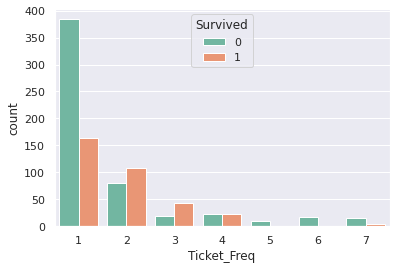

In [78]:
titanic_train['Ticket_Freq']
sns.countplot(data=titanic_train, x="Ticket_Freq", hue="Survived")

People who bought same tickets might be family/friends/etc

# 4.Feature Engineering

In [79]:
titanic_train=pd.read_csv(train_path)
titanic_test=pd.read_csv(test_path)
target=titanic_train['Survived']
Id=titanic_test[['PassengerId']]

In [80]:
class NullTransformer(BaseEstimator,TransformerMixin):

    def fit(self,df,y=None):
        return self
    def transform(self,df):
        
    ##fill Embarked with most frequently variable 'S'    
        df['Embarked'].fillna('S',inplace=True)  
        
    ##fill Cabin with 'X'
        df['Cabin'].fillna('X',inplace=True)     
        
    ##fill Fare with median value of same Pclass
        missing_Fare_index=list(df['Fare'][df['Fare'].isnull()].index)     
        
        for index in missing_Fare_index:
            if df['Pclass'][index]==1:
                df['Fare'].iloc[index]=df.groupby('Pclass')['Fare'].median()[1]
            elif df['Pclass'][index]==2:
                df['Fare'].iloc[index]=df.groupby('Pclass')['Fare'].median()[2]
            elif df['Pclass'][index]==3:
                df['Fare'].iloc[index]=df.groupby('Pclass')['Fare'].median()[3]
            
    ##fill Age with median value of same Pclass    
        index_NaN_age = list(df["Age"][df["Age"].isnull()].index)             

        for index in index_NaN_age :
            if df['Pclass'][index]==1:
                df['Age'].iloc[index]=df.groupby('Pclass')['Age'].median()[1]
            elif df['Pclass'][index]==2:
                df['Age'].iloc[index]=df.groupby('Pclass')['Age'].median()[2]
            elif df['Pclass'][index]==3:
                df['Age'].iloc[index]=df.groupby('Pclass')['Age'].median()[3]
                
        return df

In [81]:
class FeatureExtraction(BaseEstimator,TransformerMixin):

    def fit(self,df,y=None):
        return self
    def transform(self,df):
        
    ## create Family Features   
        df['Family']=df['SibSp']+df['Parch']+1  
        def groupfamily(x):
            if x==1:
                return 1
            elif (2<=x)&(x<=4):
                return 2
            elif (5<=x)&(x<=6):
                return 3
            else:
                return 4
        df['Family']=df['Family'].apply(groupfamily)
        
        df.drop(['SibSp','Parch','PassengerId'],inplace=True,axis=1)
        if 'Survived' in list(df.keys()):
            df.drop(['Survived'],inplace=True,axis=1)
                     
    ## extract Ticket Frequency and prefix
        df['Ticket_freq']=df.groupby('Ticket')['Ticket'].transform('count')
        df.drop(['Ticket'],inplace=True,axis=1)
        
    ## extract Cabin prefix
        df['Cabin']=df['Cabin'].str.get(i=0)                            
        df['Cabin'] = df['Cabin'].replace(['A', 'B', 'C','T'], 'ABCT')
        df['Cabin'] = df['Cabin'].replace(['D', 'E'], 'DE')
        df['Cabin'] = df['Cabin'].replace(['F', 'G'], 'FG')
        
    ## extract Name title
        df['Name']=df['Name'].str.split(pat=', ',n=1,expand=True)[1].str.split(pat='.',n=1,expand=True)[0]      
        def Name_transform(x):
            if x=='Mr':
                return 'Mr'
            elif x=='Mrs':
                return 'Mrs'
            elif x=='Miss':
                return 'Miss'
            else:
                return 'etc'
        df['Name']=df['Name'].apply(Name_transform)     
        
     ## Binning Age, Fare
        AGE_BINS=[-1,5,17,20,24,28,32,40,48,100]
        df['Age_cat']=pd.cut(df['Age'],AGE_BINS,labels=[0.,1.,2.,3.,4.,5.,6.,7.,8.])
        
        FARE_BINS=[-1,7.35, 7.82, 8, 10, 13, 23,30, 45, 80, 150, 1000]
        df['Fare_cat']=pd.cut(df['Fare'],bins=FARE_BINS,labels=[0.,1.,2.,3.,4.,5.,6.,7.,8.,9.,10.])
        df.drop(['Age','Fare'],inplace=True,axis=1)
        
    ## Fare to log scale 
       # df["Fare"] = df["Fare"].map(lambda x: np.log(x) if x>0 else 0)
    
        return df

In [82]:
attribs=['Pclass','Name','Sex','Age','Ticket','Fare','Cabin','Embarked','SibSp','Parch']
num_attribs=['Pclass','Age_cat','Fare_cat',"Ticket_freq"]
cat_attribs=['Name','Sex','Cabin','Embarked','Family']

pipeline1=Pipeline([
        ('NT',NullTransformer()),
        ('FE',FeatureExtraction())
])

train=pipeline1.fit_transform(titanic_train)
test=pipeline1.transform(titanic_test)

train=pd.get_dummies(train,columns=cat_attribs)
test=pd.get_dummies(test,columns=cat_attribs)


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [83]:
train=train.to_numpy()
test=test.to_numpy()

# 5.Modeling

## 5.1 Model evaluation

In [84]:
kfolds=StratifiedKFold(n_splits=3)    

scores=[]

##Base models
svc=SVC(random_state=42)
rdf=RandomForestClassifier(random_state=42)
ada=AdaBoostClassifier(random_state=42)
log=LogisticRegression(random_state=42)
grb=GradientBoostingClassifier(random_state=42)
dct=DecisionTreeClassifier(random_state=42)
ext=ExtraTreesClassifier(random_state=42)
xgb=XGBRFClassifier(random_state=42)
xgbc=XGBClassifier(random_state=42)

models=[svc,rdf,ada,log,grb,dct,ext,xgb,xgbc]

for model in models:
    scores.append(cross_val_score(model,train,target,cv=kfolds,n_jobs=-1))
    scores_mean=np.mean(scores,axis=1)

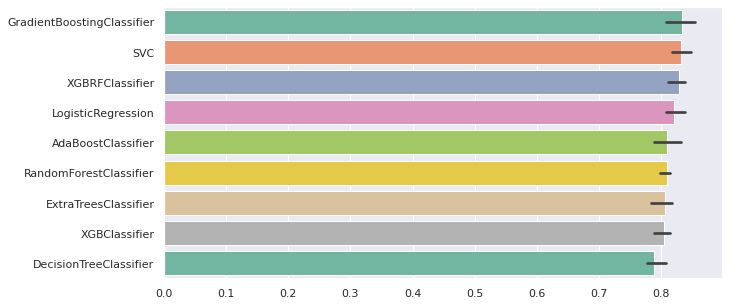

In [85]:
columns_name=[]
for model in models:
    columns_name.append(model.__class__.__name__)

scores_df=pd.DataFrame(np.array(scores).T,columns=columns_name)
scores_mean_tosort=pd.Series(np.array(scores_mean).T,index=columns_name)
scores_mean_sorted=scores_mean_tosort.sort_values(ascending=False)

f, ax1=plt.subplots(figsize=(10,5))
sns.barplot(data=scores_df,orient='h',order=list(scores_mean_sorted.index))

In [86]:
scores_mean_sorted

GradientBoostingClassifier    0.833895
SVC                           0.831650
XGBRFClassifier               0.828283
LogisticRegression            0.821549
AdaBoostClassifier            0.810325
RandomForestClassifier        0.809203
ExtraTreesClassifier          0.806958
XGBClassifier                 0.804714
DecisionTreeClassifier        0.787879
dtype: float64

## 5.2 Hyperparameter Tuning

In [88]:
def grid_search(estimator,param,X,y):

    grid=GridSearchCV(estimator, param, n_jobs=-1, cv=kfolds, return_train_score=True)
    grid.fit(X,y)

    grid_results=grid.cv_results_
    #for mean_score,param in zip(grid_results['mean_test_score'],grid_results['params']):
        #print(mean_score,param)
    
    print('\nBestParams and Score : \n',grid.best_params_,'\n',grid.best_score_)
    
    return grid.best_estimator_ , grid, estimator

In [89]:
def random_grid_search(estimator,param_d,X,y,n):

    grid=RandomizedSearchCV(estimator, param_d, n_jobs=-1, cv=kfolds, return_train_score=True, n_iter=n)
    grid.fit(X,y)

    grid_results=grid.cv_results_
    #for mean_score,param in zip(grid_results['mean_test_score'],grid_results['params']):
        #print(mean_score,param)
    
    print('\nBestParams and Score : \n',grid.best_params_,'\n',grid.best_score_)
    
    return grid.best_estimator_ , grid, estimator

### SVC

In [90]:
param_grid = [
    {'C':[0.6, 0.8,1,1.15,1.2,1.23,1.4], 'kernel':['rbf'], 'gamma':[0.1] }   
]
svc_best, svc_grid, svc=grid_search(SVC(random_state=42, probability=True),param_grid,X=train,y=target)


BestParams and Score : 
 {'C': 1.15, 'gamma': 0.1, 'kernel': 'rbf'} 
 0.8350168350168351


In [91]:
param_grid = [
    {'C': uniform(0.9,0.3), 'kernel':['rbf'], 'gamma':[0.1] }   
]
svc_best, svc_grid, svc =random_grid_search(SVC(random_state=42, probability=True),param_grid,X=train,y=target,n=20)


BestParams and Score : 
 {'C': 1.0770802237780335, 'gamma': 0.1, 'kernel': 'rbf'} 
 0.8350168350168351


### GradientBoosting

In [92]:
param_grid = [
    {'learning_rate':[0.1], 'n_estimators':[30,50,100,200,240], 'max_depth':[2,3,4] }   
]
gbc_best, gbc_grid, gbc =grid_search(GradientBoostingClassifier(random_state=42),param_grid,X=train,y=target)


BestParams and Score : 
 {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200} 
 0.8383838383838383


In [93]:
param_grid = [
    {'learning_rate':[0.1], 'n_estimators': randint(80,110), 'max_depth':[3] }   
]
gbc_best, gbc_grid, gbc =random_grid_search(GradientBoostingClassifier(random_state=42),param_grid,X=train,y=target,n=20)


BestParams and Score : 
 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 95} 
 0.8350168350168349


### LogisticRegression

In [94]:
param_grid = [
    {'penalty':['l1','l2'],'C':[0.1,0.8,0.9,1,1.1,1.2,1.3,5], 'tol':[1e-4,1e-3],'solver':['liblinear']}   
]
log_best, log_grid, log =grid_search(LogisticRegression(random_state=42),param_grid,X=train,y=target)


BestParams and Score : 
 {'C': 0.8, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001} 
 0.8226711560044894


In [95]:
param_grid = [
    {'penalty':['l1'],'C': uniform(0.7,0.3), 'tol':[1e-4],'solver':['liblinear']}   
]
log_best, log_grid, log =random_grid_search(LogisticRegression(random_state=42),param_grid,X=train,y=target,n=20)


BestParams and Score : 
 {'C': 0.8764952493479223, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001} 
 0.8226711560044894


### XGRFBoost

In [96]:
param_grid = [
    {'n_estimators':[30,50,70,100,200,300],'max_depth':[2,3,4,5], 'gamma':[0.1]}   
]
xgb_best, xgb_grid, xgb=grid_search(XGBRFClassifier(random_state=42),param_grid,X=train,y=target)


BestParams and Score : 
 {'gamma': 0.1, 'max_depth': 4, 'n_estimators': 50} 
 0.8350168350168349


In [97]:
param_grid = [
    {'n_estimators':randint(20,60),'max_depth':[4], 'gamma':[0.1]}   
]
xgb_best, xgb_grid, xgb =random_grid_search(XGBRFClassifier(random_state=42),param_grid,X=train,y=target,n=20)


BestParams and Score : 
 {'gamma': 0.1, 'max_depth': 4, 'n_estimators': 46} 
 0.8361391694725028


### XGBoost

In [98]:
param_grid = [
    {'n_estimators':[30,50,100,200],'max_depth':[2,3,4], 'gamma':[0.1]}   
]
xgbc_best, xgbc_grid, xgbc =grid_search(XGBClassifier(random_state=42),param_grid,X=train,y=target)


BestParams and Score : 
 {'gamma': 0.1, 'max_depth': 3, 'n_estimators': 100} 
 0.8417508417508417


In [99]:
param_grid = [
    {'n_estimators': randint(70,120),'max_depth':[3], 'gamma':[0.1]}   
]
xgbc_best, xgbc_grid, xgbc =random_grid_search(XGBClassifier(random_state=42),param_grid,X=train,y=target,n=20)


BestParams and Score : 
 {'gamma': 0.1, 'max_depth': 3, 'n_estimators': 89} 
 0.8417508417508417


### ADABoost

In [100]:
param_grid = [
    {'n_estimators': [30,50,100,200,300],'learning_rate':[0.9,1.0,1.1,1.2,1.3]}   
]
ada_best, ada_grid, ada =grid_search(AdaBoostClassifier(random_state=42),param_grid,X=train,y=target)


BestParams and Score : 
 {'learning_rate': 1.1, 'n_estimators': 30} 
 0.8204264870931538


In [101]:
param_grid = [
    {'n_estimators': randint(20,50),'learning_rate':[1.3]}   
]
ada_best, ada_grid, ada =random_grid_search(AdaBoostClassifier(random_state=42),param_grid,X=train,y=target,n=20)


BestParams and Score : 
 {'learning_rate': 1.3, 'n_estimators': 42} 
 0.8114478114478114


### RandomForest

In [102]:
param_grid = [
    {'n_estimators': [30,50,100,200,300],'max_depth':[2,3,4,5], 'criterion':['gini','entropy']}   
]
rdf_best, rdf_grid, rdf =grid_search(RandomForestClassifier(random_state=42),param_grid,X=train,y=target)


BestParams and Score : 
 {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 300} 
 0.8361391694725029


In [103]:
param_grid = [
    {'n_estimators': randint(200,400),'max_depth':[5], 'criterion':['gini']}   
]
rdf_best, rdf_grid, rdf =random_grid_search(RandomForestClassifier(random_state=42),param_grid,X=train,y=target,n=20)


BestParams and Score : 
 {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 297} 
 0.8361391694725029


### ExtraTree

In [104]:
param_grid = [
    {'n_estimators': [30,50,100,200,300],'max_depth':[2,3,4,5], 'criterion':['gini','entropy']}   
]
ext_best, ext_grid, ext =grid_search(ExtraTreesClassifier(random_state=42),param_grid,X=train,y=target)


BestParams and Score : 
 {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100} 
 0.8327721661054994


In [105]:
param_grid = [
    {'n_estimators': randint(80,150),'max_depth':[5], 'criterion':['gini']}   
]
ext_best, ext_grid, ext =random_grid_search(ExtraTreesClassifier(random_state=42),param_grid,X=train,y=target,n=20)


BestParams and Score : 
 {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 81} 
 0.8327721661054994


## 5.3 Ensemble & Prediction

In [106]:
models=[
        ('svc', svc_best),
        ('log', log_best), 
        ('xgb',xgb_best),
        ('gbc', gbc_best),
        ('xgbc', xgbc_best),
        ('ada', xgbc_best),
        ('rdf',rdf_best),
        ('ext',ext_best)
    
]

vot_hard = VotingClassifier(estimators=models, voting='hard', n_jobs=-1)

vot_hard.fit(train,target)

vot_soft = VotingClassifier(estimators=models, voting='soft', n_jobs=-1)

vot_soft.fit(train,target)

stack=StackingClassifier(estimators=models,cv=kfolds,n_jobs=-1,stack_method='predict_proba')

stack.fit(train,target)

prediction_hard=vot_hard.predict(test)
prediction_soft=vot_soft.predict(test)
prediction_stack=stack.predict(test)


In [107]:
kfolds=StratifiedKFold(n_splits=3)    

scores=[]

models=[vot_hard,vot_soft,stack]

for model in models:
    scores.append(cross_val_score(model,train,target,cv=kfolds))
    scores_mean=np.mean(scores,axis=1)

In [108]:
scores_mean

array([0.84175084, 0.83501684, 0.83838384])

In [109]:
Survived_hard = pd.Series(prediction_hard, name="Survived")
result_hard = pd.concat([Id,Survived_hard],axis=1)
result_hard.to_csv("submission_hard.csv",index=False)

Survived_soft = pd.Series(prediction_soft, name="Survived")
result_soft = pd.concat([Id,Survived_soft],axis=1)
result_soft.to_csv("submission_soft.csv",index=False)

Survived_stack = pd.Series(prediction_stack, name="Survived")
result_stack = pd.concat([Id,Survived_stack],axis=1)
result_stack.to_csv("submission_stack.csv",index=False)